# KNN Regression & Classifier

''' 
Step 01:

KNN Regressor:
1. Import data set
2. Seperate x(Gender, Height) and y (y=Weight)
3. Train = 70%, Test = 30%
4. Apply Linear Regression
5. Evaluate Model (Accuracy, MSE, MAE)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate Model (Accuracy, MSE, Prediction)

Tuning:
1. Apply Randomized Search CV to select best K vlaue
2. Compare accuracy with default KNN and After tuning K value
3. Evaluate Model (Accuracy, MSE, Prediction) and Compare with Old KNN model and Linear regression as well.


Step 02:

KNN Classifier:
1. Import data set
2. Seperate x and y (y=Gender)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier 
5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

'''

# Solution: Step 01:KNN Regressor:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [6]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [9]:
df1.Gender =le.fit_transform(df1.Gender) 

In [10]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
df1.Gender.unique() # Male = 1 , Female = 0

array([1, 0])

In [12]:
x = df1.drop('Weight',axis=1)
y = df.Weight

# Spliting the dataset for train and test

In [13]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=.70, random_state=280)

In [14]:
xtrain.shape

(5988, 2)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [17]:
xtrain.shape

(5988, 2)

In [18]:
xtrain.head()

,Gender,Height
4497,1,64.451212
922,1,69.812022
7854,0,65.238507
5669,0,64.997610
1937,1,67.064124


In [19]:
ytrain.head()

4497    147.044657
922     188.064984
7854    125.404933
5669    123.868429
1937    178.514820
Name: Weight, dtype: float64

In [20]:
testing = lr.predict(xtest)

In [21]:
testing

array([107.99188809, 105.71622957, 141.36307305, ..., 128.4982634 ,
       133.28435468, 192.4655118 ])

In [22]:
# Accuracy
lr.score(xtrain, ytrain)

0.8987684325692558

In [23]:
lr.score(xtest, ytest)

0.9028067919217864

In [24]:
# Mean Square Error 
from sklearn.metrics import mean_squared_error #MSE

mse = mean_squared_error(ytest, testing)# testing error
mse

97.79089304944755

In [25]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, testing)
mae

7.898595670418773

# KNN Linear Regrssion

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
kr = KNeighborsRegressor()
kr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [28]:
# Prediction
prediction1= kr.predict(xtest)

In [29]:
prediction1

array([108.0768846 , 107.73977516, 143.18162678, ..., 132.3776309 ,
       131.6838739 , 188.54388668])

In [30]:
# Accuracy
kr.score(xtrain, ytrain)

0.918184014981459

In [31]:
kr.score(xtest, ytest)

0.8824191942939312

# Mean Square error 

In [32]:
# Mean Square Error
mse1 = mean_squared_error(ytest, prediction1)

In [33]:
mse1

118.30386323103018

# Tuning by RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
k = np.random.randint(3,50,47)
ids = {
    'n_neighbors' : k
}

In [36]:
print(ids)

{'n_neighbors': array([14, 40, 32, 31, 25, 30, 47, 24, 24, 30, 24, 19, 11, 31, 29, 17, 48,
       26, 46, 24, 49, 19, 14, 11, 20, 18,  3, 13, 48, 30, 19, 31, 46,  6,
        7, 20, 28, 15, 12, 49, 45, 26, 37, 48, 38, 18,  7])}


In [37]:
rcv = RandomizedSearchCV(kr,ids, n_iter =20,cv = 3)

In [38]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=20,
                   param_distributions={'n_neighbors': array([14, 40, 32, 31, 25, 30, 47, 24, 24, 30, 24, 19, 11, 31, 29, 17, 48,
       26, 46, 24, 49, 19, 14, 11, 20, 18,  3, 13, 48, 30, 19, 31, 46,  6,
        7, 20, 28, 15, 12, 49, 45, 26, 37, 48, 38, 18,  7])})

In [39]:
rcv.best_score_

0.8937377207686303

In [40]:
rcv.best_params_  # The best K value is 46

{'n_neighbors': 46}

In [41]:
rcv.score(xtest,ytest) # After tuning accuracy :

0.8988730228234761

# Compare Accuracy

In [42]:
# After tuning accuracy :0.8988730228234761
# Default KNN accuracy: 0.8824191942939312
# Linear Regression accuracy: 0.9028067919217864

In [43]:
prediction2 = rcv.predict(xtest)
prediction2

array([107.86236611, 104.0589686 , 141.7292614 , ..., 131.08632541,
       132.63173295, 193.64702173])

In [44]:
mse2 = mean_squared_error(ytest, prediction2)

In [45]:
mse2 

101.74885267214579

# Compare MSE

In [46]:
# After tuning mse2 :101.74885267214579
# Default KNN mse1: 118.30386323103018
# Linear Regression mse: 97.79089304944755

# Compare prediction value

In [47]:
xtest.head()

,Gender,Height
7905,0,59.086006
6105,0,58.706315
5509,0,64.653941
2756,1,68.772464
3081,1,69.431259


In [48]:
# Linear Regression 
lr.predict([[0,59.086006]])

array([107.99188911])

In [49]:
#KNN Regression
kr.predict([[0,59.086006]])

array([108.0768846])

In [50]:
# After Tuning 
rcv.predict([[0,59.086006]])

array([107.86236611])

In [51]:
ytest.head()

7905    107.829004
6105    101.990470
5509    135.073886
2756    187.550831
3081    200.218490
Name: Weight, dtype: float64

In [52]:
# original y value for [[0,59.086006]] :107.829004

# Step 02: KNN Classifier

In [53]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [54]:
x = df2.drop('Gender',axis=1)
y = df2.Gender

# Spliting the dataset to train and test

In [55]:
xtrain,xtest,ytrain,ytest=tts(x,y,train_size=.70, random_state=242)

In [56]:
xtrain.head()

,Height,Weight
5554,63.091703,121.008873
1335,64.922423,158.412559
6168,60.579208,127.354500
7705,63.414142,118.771265
5084,67.149206,139.552815


# KNN Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
clf = KNeighborsClassifier(n_neighbors=49)

In [59]:
clf.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=49)

# Evaluation of the Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

In [60]:
accuracy = clf.score(xtest,ytest)
accuracy 

0.9193611219322166

In [61]:
prediction = clf.predict(xtest)
prediction

array(['Male', 'Male', 'Female', ..., 'Male', 'Male', 'Female'],
      dtype=object)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, plot_roc_curve

In [63]:
# Classification Report
print(classification_report(ytest, prediction))

              precision    recall  f1-score   support

      Female       0.89      0.91      0.90      1050
        Male       0.94      0.93      0.93      1517

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [64]:
xtest.shape

(2567, 2)

In [65]:
# Confution Matrix
con_mat = confusion_matrix(ytest, prediction)
con_mat

array([[ 956,   94],
       [ 113, 1404]])

<AxesSubplot:>

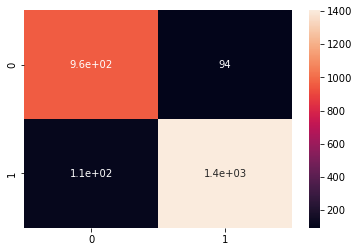

In [66]:
import seaborn as sns
sns.heatmap(con_mat,annot=True)

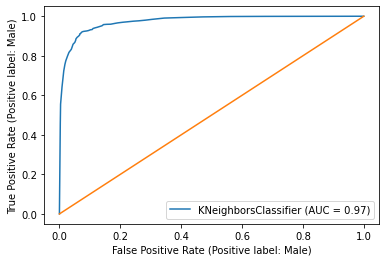

In [67]:
# ROC curve
import matplotlib.pyplot as plt

plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])

In [68]:
# Here the AUC is 0.97